# Assignment 13: Decision Tree

**Objective:** The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

#### Tasks:
#### 1. Data Preparation: 
* Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [959]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [961]:
heart = pd.read_excel(r"F:\Data science Course by ExcelR\ASSIGNMENTS\13. Decision Tree\heart_disease.xlsx",sheet_name=1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [962]:
heart.shape

(908, 13)

We have 908 columns and 13 rows.

#### 2. Exploratory Data Analysis (EDA):
* Perform exploratory data analysis to understand the structure of the dataset.

In [967]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

These are the column names of out dataset.

In [970]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


We have a total of 13 columns 
* 5 columns are of int type
* 6 are of object type or categorical type
* 1 is of float type
* 1 is of boolean type

In [973]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


* There seems to be few outliers in trestbps, chol and oldpeak

#### Check for missing values, outliers, and inconsistencies in the data.

In [977]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

We have many null rows in oldpeak column.

In [980]:
heart.duplicated().sum()

1

We do have 1 duplicate value in the dataset

In [983]:
heart.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

exhang is a binary column but we see it has 4 unique values we need to explore it further.

In [986]:
# Let's check for number of outlier in numerical columns
# Function to identify outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each column and summarize
outlier_summary = {}
for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']:
    outliers = detect_outliers(heart, col)
    outlier_summary[col] = len(outliers)

# Display the outlier counts for each column
outlier_summary


{'age': 1, 'trestbps': 22, 'chol': 187, 'thalch': 1, 'oldpeak': 16, 'num': 0}

We do have few outliers in numerical columns.

#### Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [990]:
#Let's separate numerical and categorical columns
obj_cols = (heart.dtypes == 'object')
obj_cols = (obj_cols[obj_cols] == True).index
print("Obejct Columns are: ")
print(obj_cols)
print()
num_cols = (heart.dtypes != 'object')
num_cols = (num_cols[num_cols] == True).index
print("Numerical Columns are: ")
print(num_cols)

Obejct Columns are: 
Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

Numerical Columns are: 
Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num'], dtype='object')


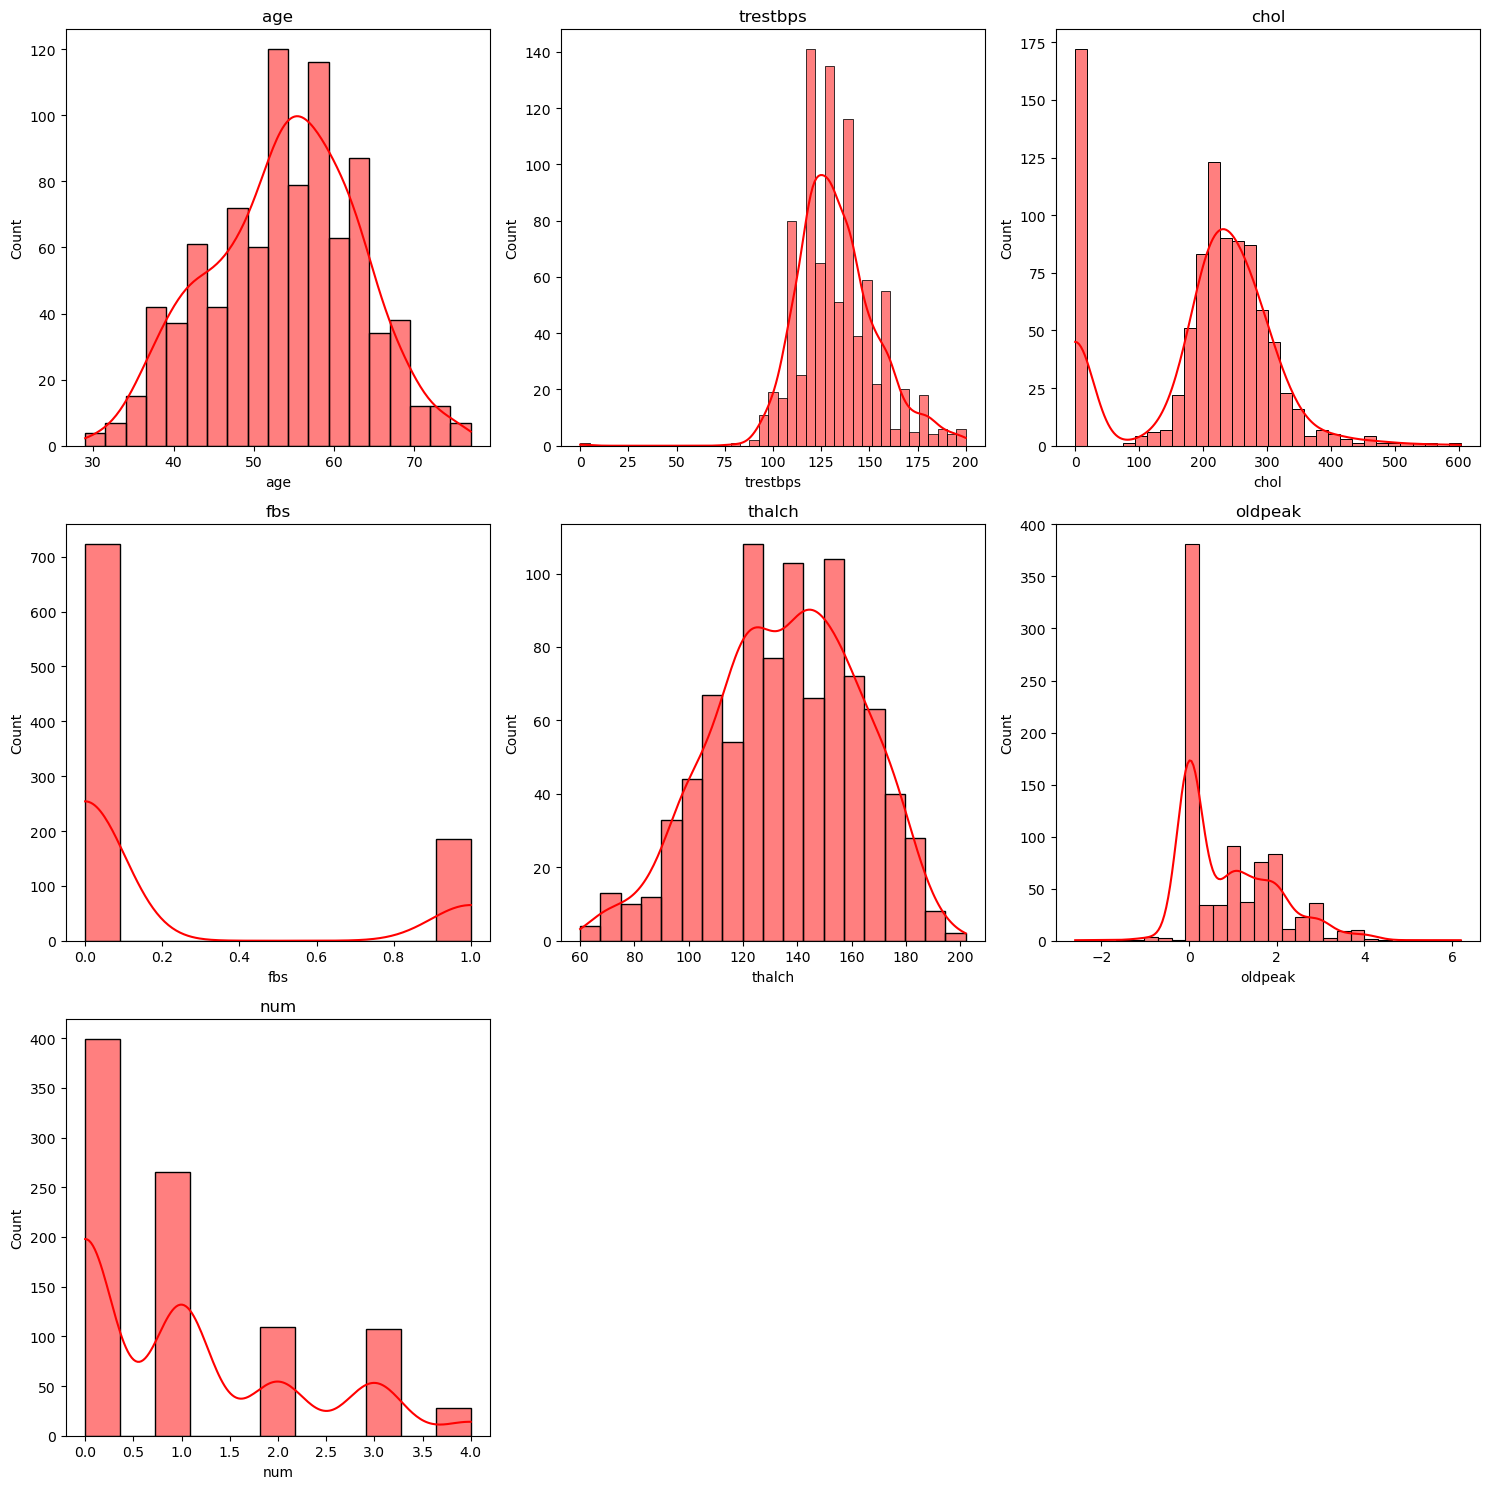

In [992]:
# Let's Check for distribution numerical column data using histplot

# df_cols = heart.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:                #looping through all the columns one by one
    plt.subplot(3, 3, index)       #creating subplot
    sns.histplot(x=heart[col], color="red", kde=True)         # creating hist plot inside each subplot
    plt.title(f'{col}')
    index += 1                     #increse the index
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

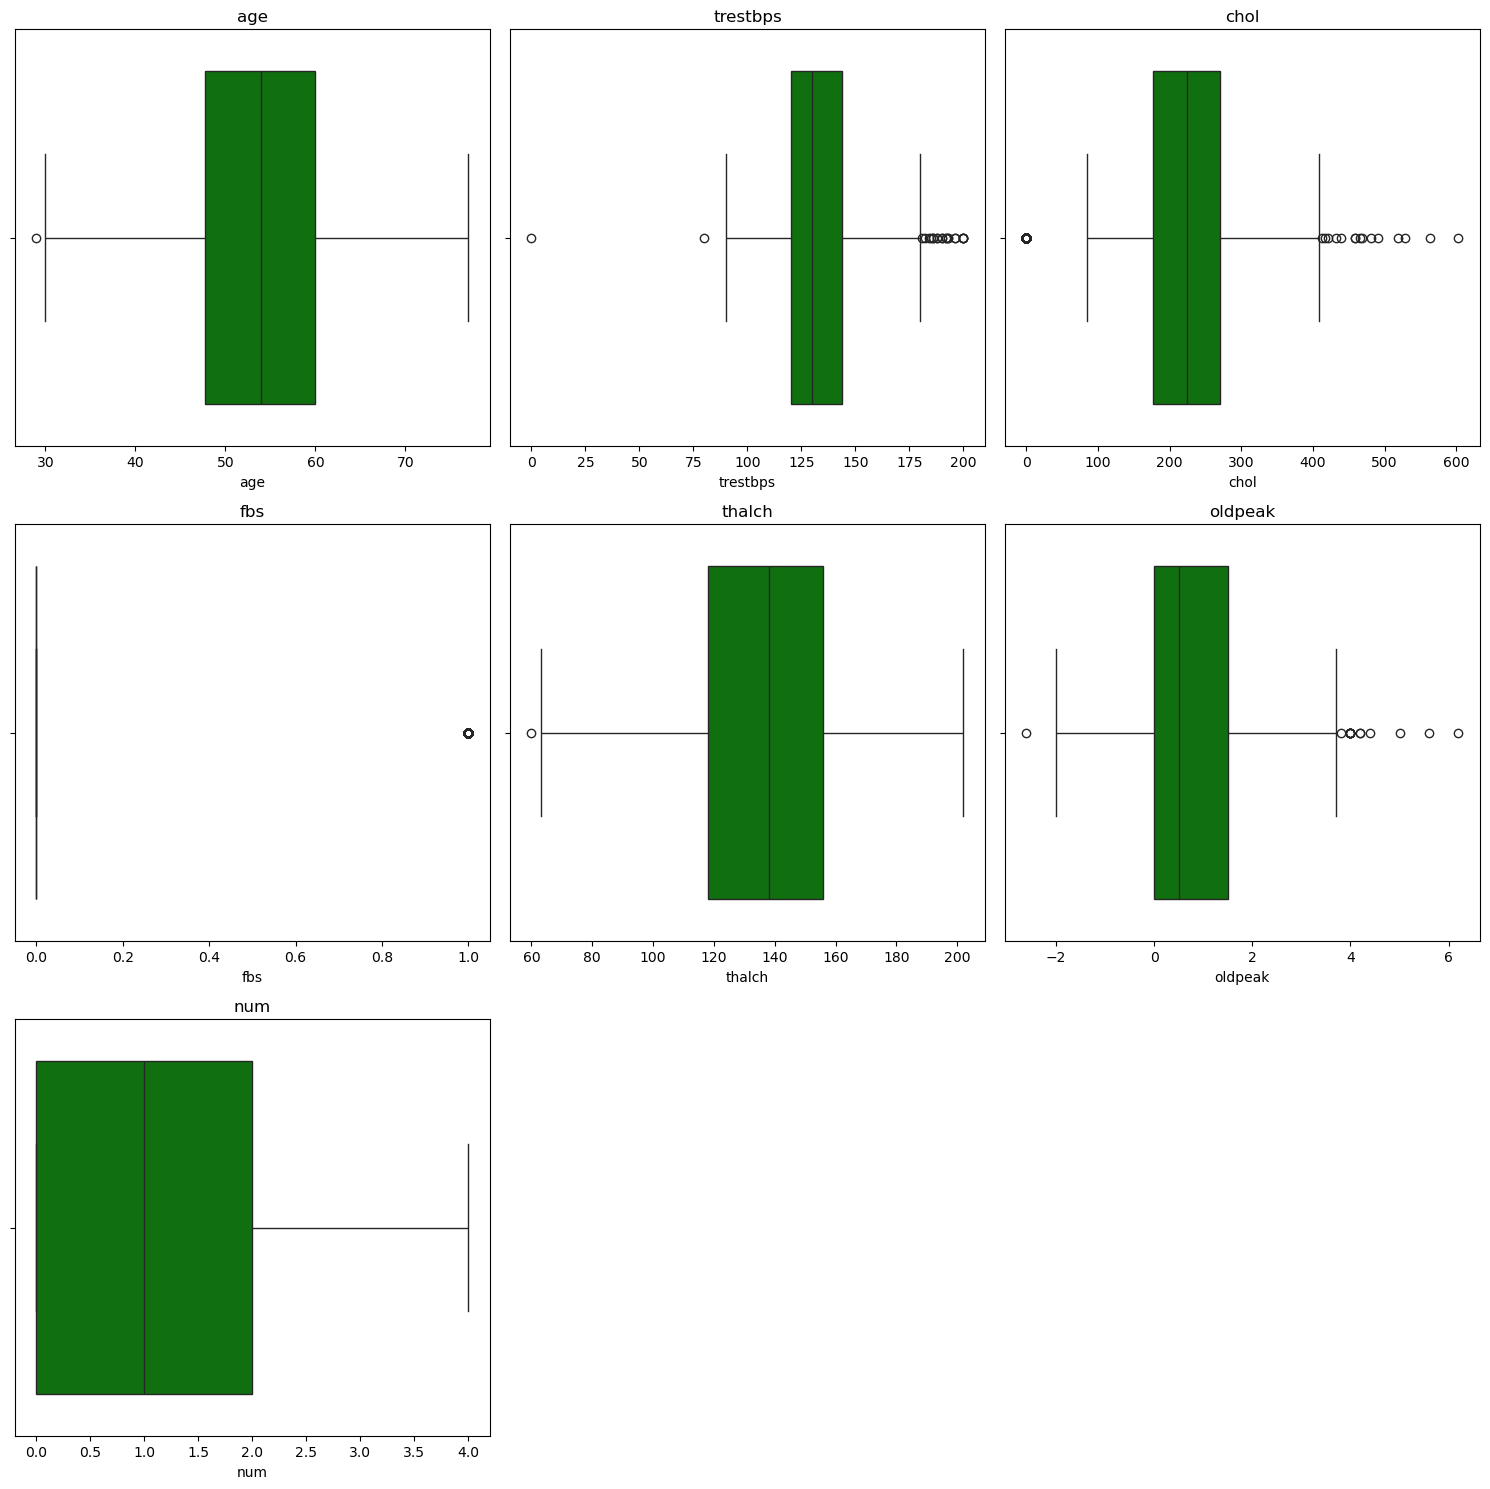

In [994]:
# Let's Check for distribution numerical column data using histplot

# df_cols = heart.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:                #looping through all the columns one by one
    plt.subplot(3, 3, index)       #creating subplot
    sns.boxplot(x=heart[col], color="green")         # creating hist plot inside each subplot
    plt.title(f'{col}')
    index += 1                     #increse the index
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* This is a health care dataset so it is very sensitive few outlier may mean something important that we lack knowledge of so it's always better to get advice from a professional.
* **For this example we are assuming that :**
* trestbps is has some datapoint sitting at 0 that is probably a typo or some mistake
* chol also at 0 is probably also an outlier, but the datapoints more than interquartile range probably mean something important so we'll avoid doing anything in that area.
* The old peak has one value less than -2 is probaly an outlier so we'll remove that

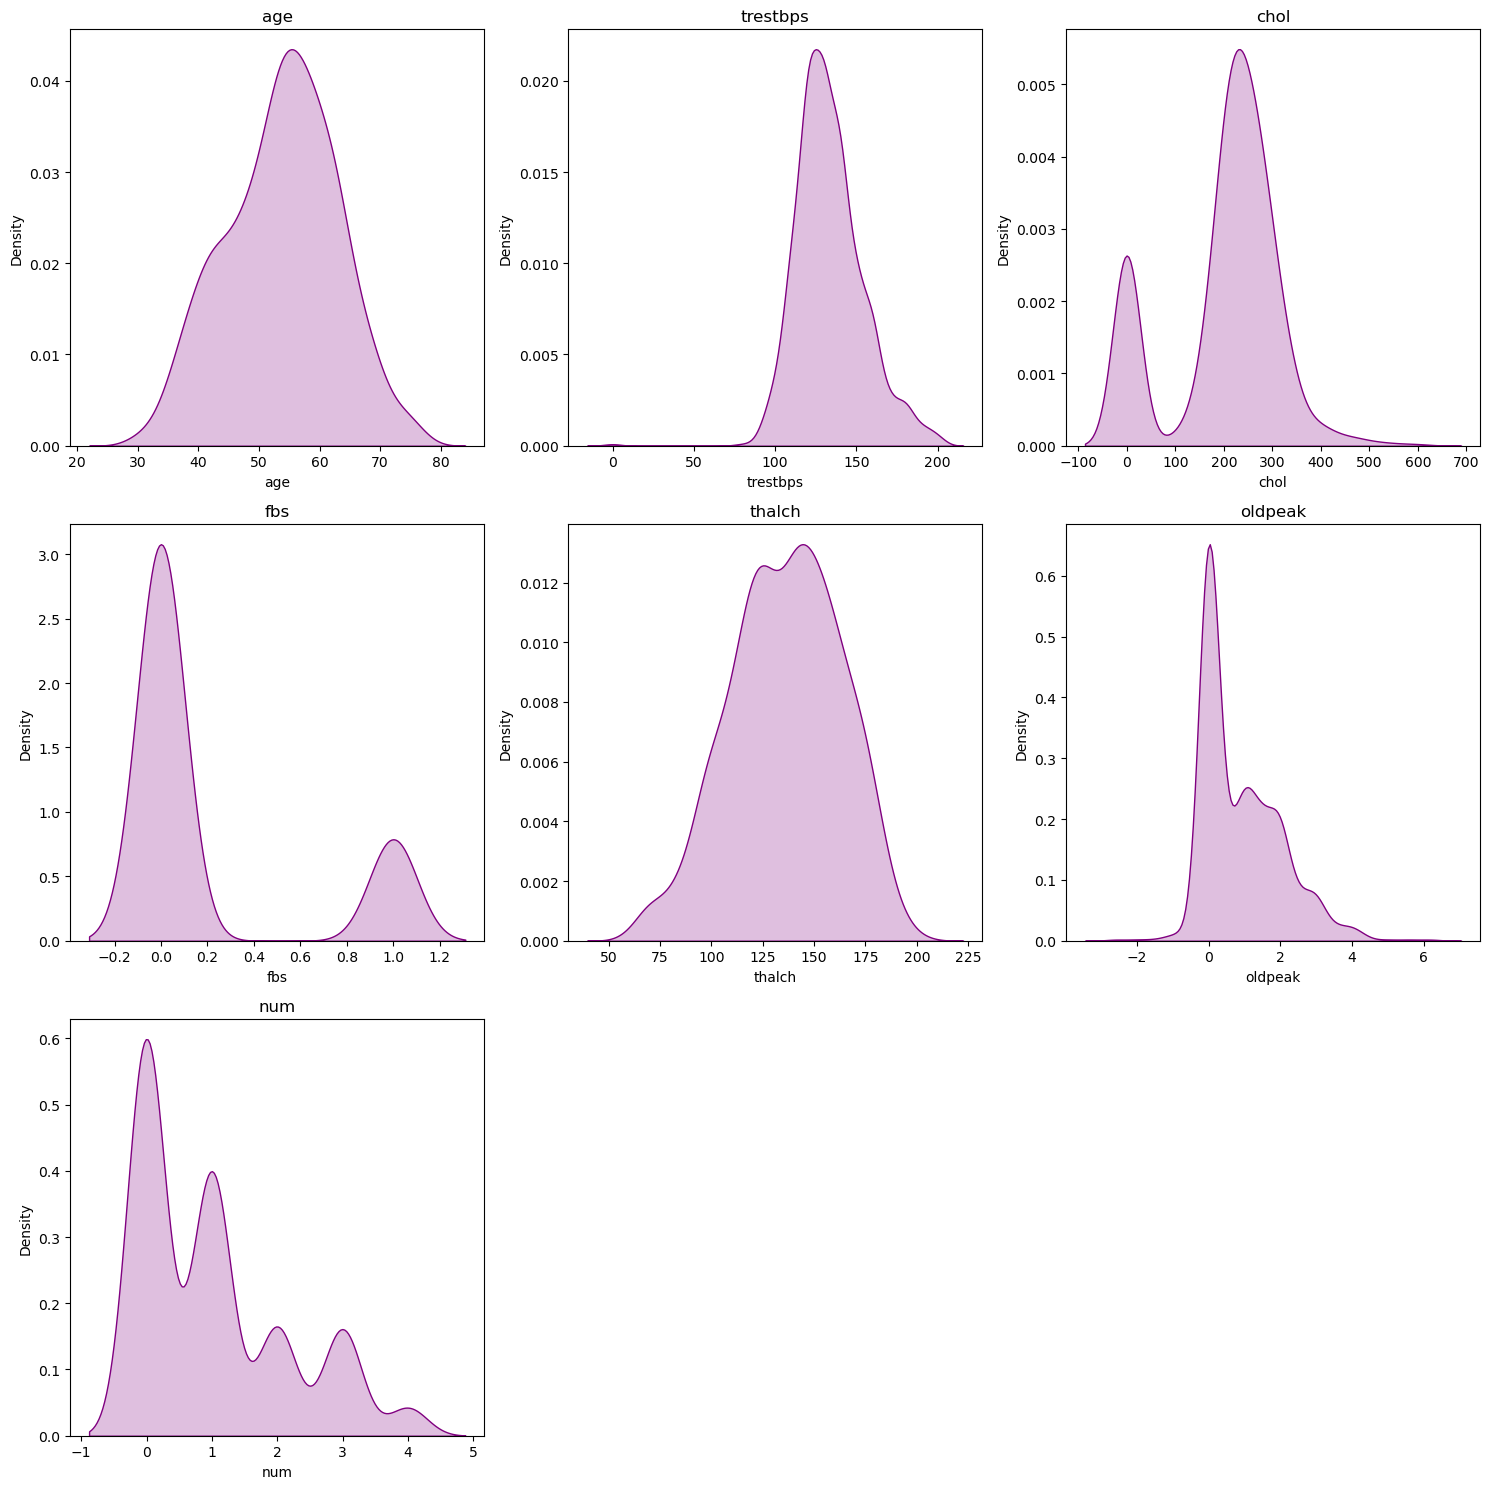

In [996]:
# Let's Check for distribution numerical column data using histplot

# df_cols = heart.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:                #looping through all the columns one by one
    plt.subplot(3, 3, index)       #creating subplot
    sns.kdeplot(x=heart[col], fill=True, color="purple")         # creating hist plot inside each subplot
    plt.title(f'{col}')
    index += 1                     #increse the index
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

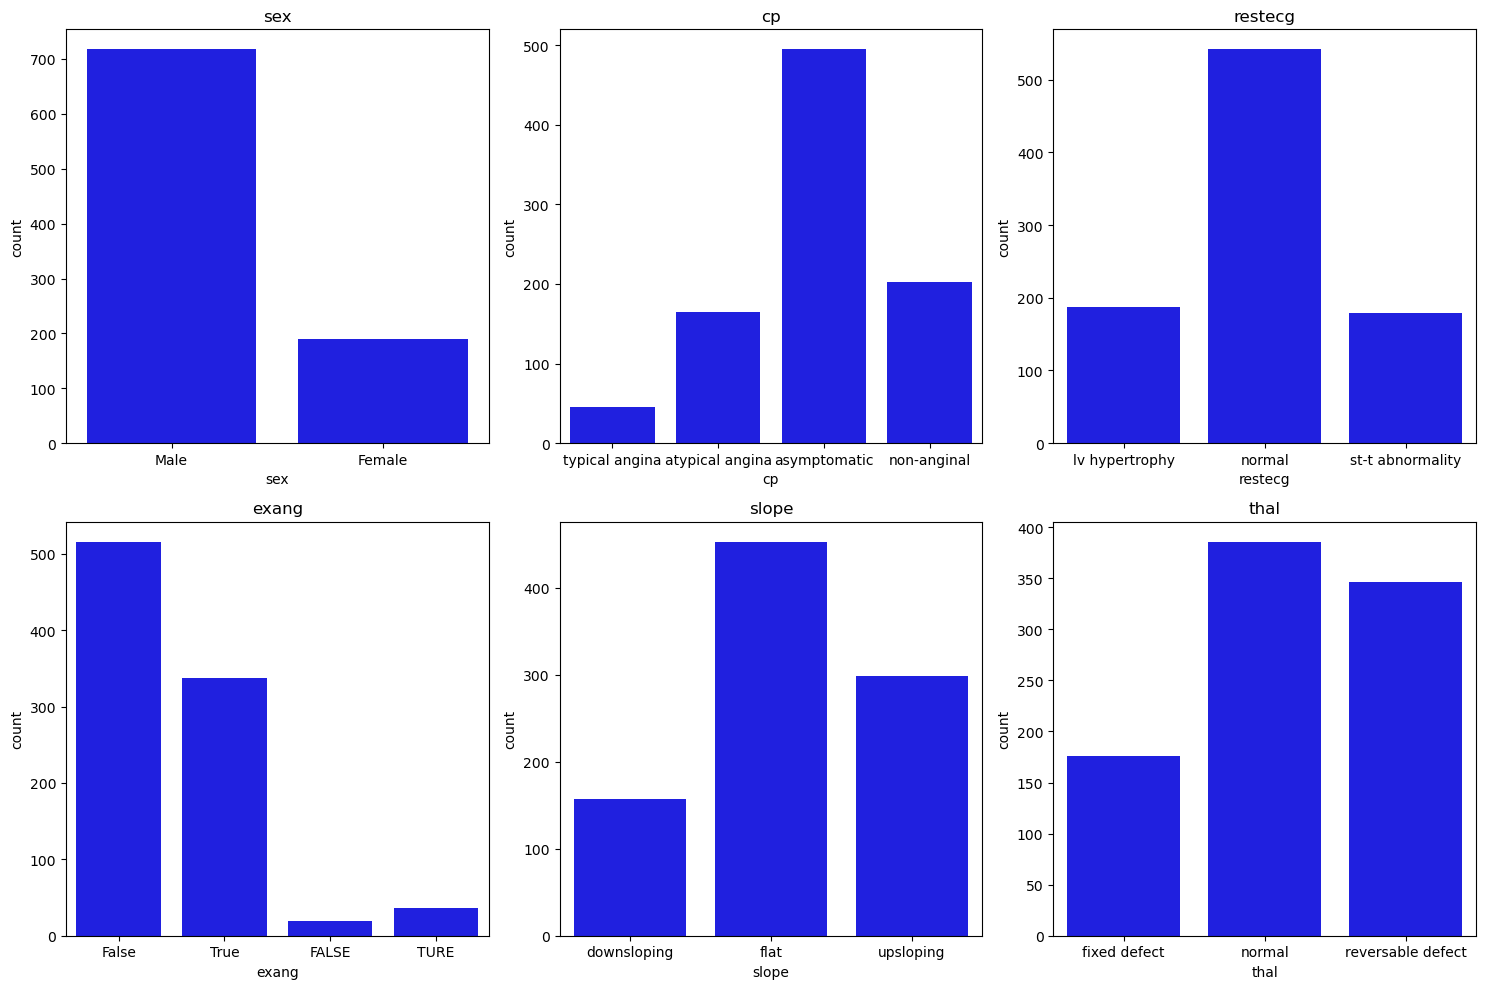

In [997]:
# Let's work with categorical column now
# Let's Check for distribution categorical column data using countplot

plt.figure(figsize=(15,10))        #setting up figure size
index = 1                          #set index to 1
for col in obj_cols:                #looping through all the columns one by one
    plt.subplot(2, 3, index)       #creating subplot
    sns.countplot(x=heart[col], color='blue')         # creating hist plot inside each subplot
    plt.title(f'{col}')
    index += 1                     #increse the index
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* We infer that the dataset cointains more number of male than female
* cp column has most number of asymptomatic
* exang column has some data inconsistencies we need to fix that.

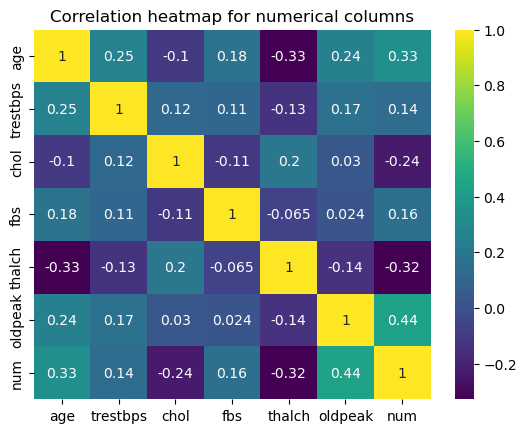

In [999]:
# let's plot correlation matrix for numerical columns
sns.heatmap(heart.corr(numeric_only=True), cmap='viridis', cbar="True", annot=True)
plt.title("Correlation heatmap for numerical columns")
plt.show()

* We have both positive and negative correlated columns.
* We can see none of the columns are highly correlated so we can retain all the features.

#### 3. Feature Engineering:

In [1002]:
#let's remove duplicated rows first
print(heart.shape)
heart.drop_duplicates(inplace=True)
print(heart.shape)

(908, 13)
(907, 13)


There was only one duplicated value.

In [1004]:
# Let's handle missing values first
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [1005]:
# Let's see the % of null values in the oldpeak column
(heart["oldpeak"].isnull().sum() / len(heart["oldpeak"]))*100

6.835722160970231

It's around 6% so we'll be just remove them.

In [1007]:
print(heart.shape)
heart.dropna(inplace=True)
print(heart.shape)

(907, 13)
(845, 13)


* Hence we removed all the null values.

In [1009]:
# Let's remove the above selected outliers from boxplot
def remove_outliers(df, column):                         #function to remove outliers
    Q1 = df[column].quantile(0.25)                       #defining Q1 
    Q3 = df[column].quantile(0.75)                       #defining Q3
    IQR = Q3 - Q1                                        #defining IQR
    lower_bound = Q1 - 1.5 * IQR                         #calculating lower bound
    upper_bound = Q3 + 1.5 * IQR                         #calculating upper bound
    return df[(df[column] >= lower_bound)]               #returning all the rows with greater than lower bound only since that is what we decided from boxplots
                                                    # We are assuming that columns having more value than IQR reveal some important obsetvation so we'll avoid removing it

print("Dataset size before removing outliers: ", heart.shape)
for col in ['trestbps','chol','oldpeak']:
    heart = remove_outliers(heart, col)                                            # calling the function
print("Dataset size after removing outliers: ", heart.shape)

Dataset size before removing outliers:  (845, 13)
Dataset size after removing outliers:  (688, 13)


Hence selected outliers are removed here.

In [1011]:
# def remove_outliers(df, column):                  #function to remove outliers
#     Q1 = df[column].quantile(0.25)                #defining Q1 
#     Q3 = df[column].quantile(0.75)                #defining Q3
#     IQR = Q3 - Q1                                 #defining IQR
#     lower_bound = Q1 - 1.5 * IQR                  #calculating lower bound
#     upper_bound = Q3 + 1.5 * IQR                  #calculating upper bound
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]    #returning all the rows with lesser than lower bound and more than upper bound

# print("Dataset size before removing outliers: ", heart.shape)
# for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']:
#     heart = remove_outliers(heart, col)                 # calling the function
# print("Dataset size after removing outliers: ", heart.shape)

In [1012]:
# We also found inconsistence in exang column
heart['exang'].value_counts()

exang
False    429
True     258
FALSE      1
Name: count, dtype: int64

In [1013]:
#converting that inconsistent value which we see above.
heart['exang'] = heart['exang'].replace({'FALSE':False})

C:\Users\peros\AppData\Local\Temp\ipykernel_9760\3335076071.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart['exang'] = heart['exang'].replace({'FALSE':False})


In [1014]:
heart['exang'].unique()

array([False,  True])

Now we have consistent values.

In [1017]:
# Let's convert categorical columns to numerical column for our ML model.
# We'll be using LabelEncoder for this task
from sklearn.preprocessing import LabelEncoder

for col in obj_cols:
    le = LabelEncoder()
    heart[col] = le.fit_transform(heart[col])
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


In [1018]:
# Feature extraction
x = heart.drop('num', axis=1)    # features all cols except 'num'
y = heart['num']                 # target column 0 indicate no heart disease, 1,2,3,4 indicates presence of heart disease
x.shape, y.shape

((688, 12), (688,))

In [1019]:
# Let's scale all the columns for better understanding and fast training of the model.
# We'll be using standard scaler for this example
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [1020]:
x                                  # scaled features.

array([[ 1.11220386,  0.59301766,  2.30547137, ...,  1.26817695,
        -1.69691179, -1.64726035],
       [-1.29166843,  0.59301766,  0.19340173, ..., -0.82897344,
        -0.2466319 , -1.64726035],
       [ 0.45660233,  0.59301766, -0.8626331 , ..., -0.46425163,
        -0.2466319 , -1.64726035],
       ...,
       [ 0.89367002,  0.59301766, -0.8626331 , ...,  0.9946356 ,
        -1.69691179,  1.13729769],
       [ 1.00293694,  0.59301766, -0.8626331 , ...,  1.90644011,
        -0.2466319 , -0.25498133],
       [ 1.00293694,  0.59301766, -0.8626331 , ...,  1.90644011,
        -0.2466319 ,  1.13729769]])

#### 4. Decision Tree Classification:

**Split the dataset into training and testing sets (e.g., using an 80-20 split).**

In [1024]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((550, 12), (138, 12), (550,), (138,))

**Implement a Decision Tree Classification model using a library like scikit-learn.**

In [1030]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

**Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).**

In [1045]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [1048]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 3, 0, 0,
       0, 1, 0, 0, 1, 3, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       3, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 4, 1, 0, 1, 1, 0, 0, 4, 1, 3, 1,
       2, 2, 0, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 3, 1, 0, 0, 0, 0, 4, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 3, 1, 0, 3, 2, 0, 0, 4,
       1, 0, 2, 0, 1, 1], dtype=int64)

In [1054]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Testing Accuracy Score : ",accuracy_score(y_pred, y_test))
print("Testing Precision Score : ",precision_score(y_pred, y_test, average='weighted'))
print("Testing Recall Score : ",recall_score(y_pred, y_test, average='weighted'))
print("Testing F1 Score : ",f1_score(y_pred, y_test, average='weighted'))

Testing Accuracy Score :  0.5579710144927537
Testing Precision Score :  0.5436467812605325
Testing Recall Score :  0.5579710144927537
Testing F1 Score :  0.52976359625976


In [1050]:
#let's built a classification report and evaluate all the require parametrics
from sklearn.metrics import classification_report

print("Classification Report : \n",classification_report(y_pred, y_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        67
           1       0.55      0.27      0.36        44
           2       0.12      0.10      0.11        10
           3       0.19      0.25      0.21        12
           4       0.00      0.00      0.00         5

    accuracy                           0.56       138
   macro avg       0.31      0.31      0.30       138
weighted avg       0.54      0.56      0.53       138



#### 5. Hyperparameter Tuning:

**Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.**

In [926]:
# Let's do this using Grid Search CV
# Let's define the model first
model = DecisionTreeClassifier(random_state=4)
model

DecisionTreeClassifier(random_state=4)

In [928]:
# let's define parameter girds
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None, 5, 10, 15, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5]
}

In [930]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = model,
    param_grid = params,
    cv = 5,
    scoring='accuracy',
    verbose=1,
    n_jobs=1
)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=4), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [932]:
#fit the grid search model
grid.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=4), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [933]:
#finding the best parameters
print("Best Parameters are : ",grid.best_params_)
print("Best Score found is : ",grid.best_score_)

Best Parameters are :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score found is :  0.6036363636363636


Above is the best parameter for the model to form the best possible model based on given parameters

#### 6. Model Evaluation and Analysis:

**Analyse the performance of the Decision Tree model using the evaluation metrics obtained.**

In [939]:
#let's form the best model obtained from grid search cv
best_model = grid.best_estimator_
best_model

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=4)

In [952]:
print("training Accuracy : ", accuracy_score(best_model.predict(x_train), y_train))
print("Test Accuracy : ", accuracy_score(best_model.predict(x_test), y_test))

training Accuracy :  0.7163636363636363
Test Accuracy :  0.6666666666666666


There is quite a difference in the taining and testing accuracy it may tend to overfit the model

In [1056]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Testing Accuracy Score : ",accuracy_score(y_pred, y_test))
print("Testing Precision Score : ",precision_score(y_pred, y_test, average='weighted'))
print("Testing Recall Score : ",recall_score(y_pred, y_test, average='weighted'))
print("Testing F1 Score : ",f1_score(y_pred, y_test, average='weighted'))

Testing Accuracy Score :  0.5579710144927537
Testing Precision Score :  0.5436467812605325
Testing Recall Score :  0.5579710144927537
Testing F1 Score :  0.52976359625976


In [1058]:
# Classification Report of the best model formed
print("Classification Report:\n", classification_report(best_model.predict(x_test), y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        77
           1       0.64      0.39      0.48        36
           2       0.25      0.18      0.21        11
           3       0.19      0.23      0.21        13
           4       0.00      0.00      0.00         1

    accuracy                           0.67       138
   macro avg       0.38      0.35      0.36       138
weighted avg       0.68      0.67      0.66       138



**Visualize the decision tree structure to understand the rules learned by the model and identify important features**

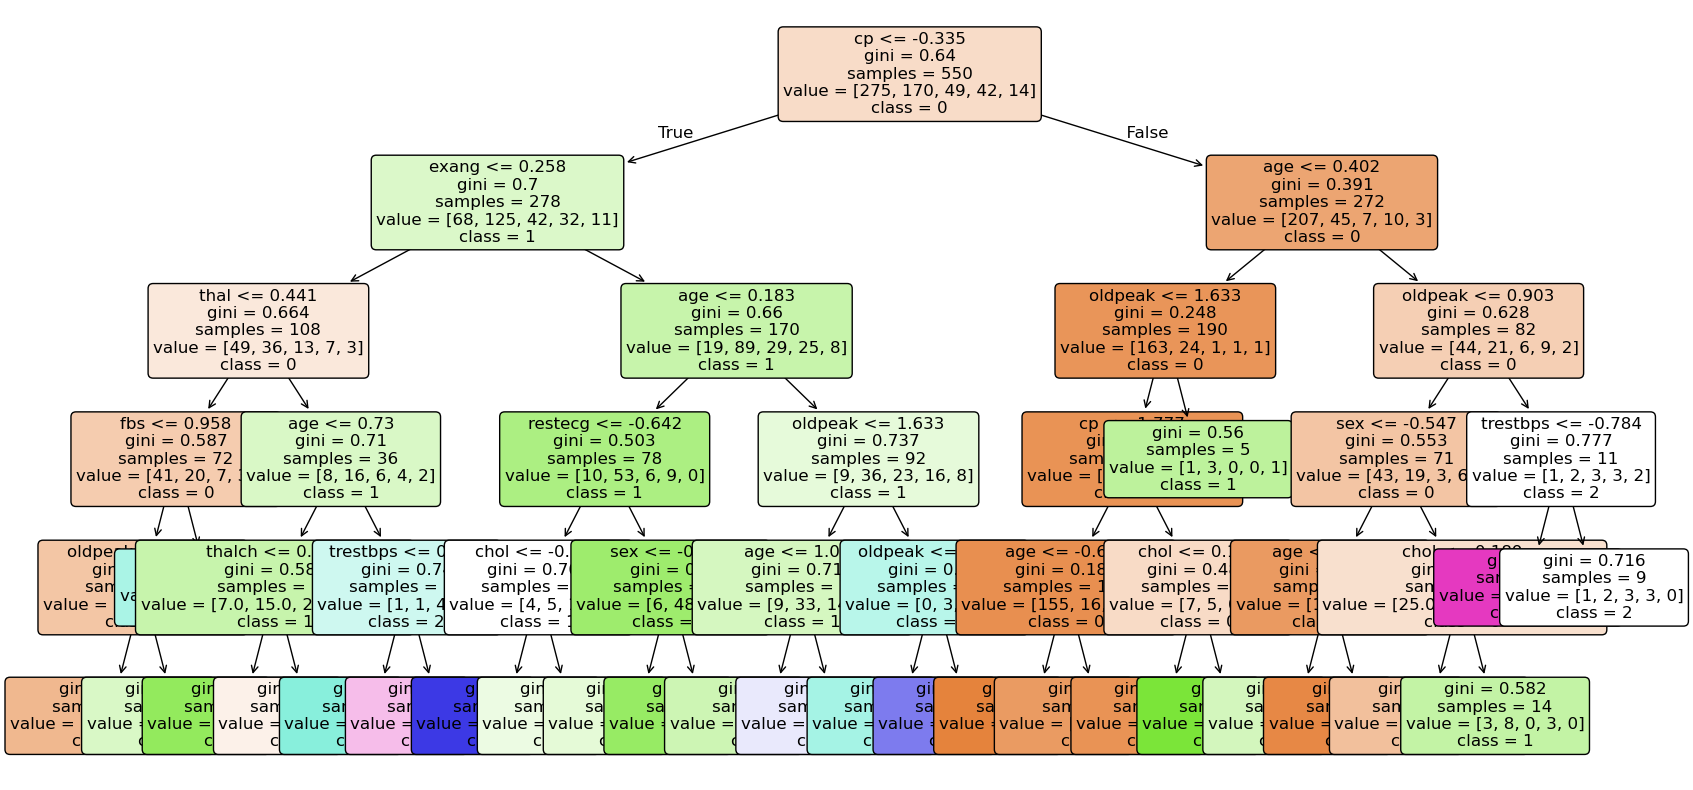

In [1061]:
from sklearn.tree import plot_tree

# Assuming 'best_model' is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,                                   # Trained decision tree model
    feature_names=heart.columns,                  # Column names from the feature matrix
    class_names=best_model.classes_.astype(str),  # Class labels
    filled=True,                                  # Add colors to indicate purity
    rounded=True,                                 # Rounded corners
    fontsize=12                                   # Font size
)
plt.show()

We infer that:
* The model chose cp as the root node, so we can say cp is the most important feature chosen by the model meaning the cp has the highest information gain.
* The features at the top indicates that the model chose those as more important features like cp, age, exang, oldpeak and so on.
* sex and slopes are less important features.
* value showing some list of samples means distribution of each class.
* gini value is the importance score given to the feature.
* We can see that the model is having many branches so it may tend to overfit the model.

#### Interview Questions:
#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
**ANSWER**
* **Max Depth :** Limits the depth of the tree
* **Min Samples Split :** specifies the minimum samples of split in an internal node.
* **Min Samples Leaf :** The minimum number of samples required to be at the leaf nodes. Larger numbers are better for this since it reduces overfitting.
* **Max Features :** Limits the number of features to consider for a split. smaller value is better since it reduces the complexity and overfitting.
* **Criterion :** The function to measure the quality of a split
* **Splitter :** Determines the strategy used to split at each node like "best" or "random". It affects the tree's construction speed and quality.


#### 2. What is the difference between the Label encoding and One-hot encoding?
**ANSWER**
* **Label Encoding:** Converts each category into a unique integer label.
  * This method is useful for ordinal data may introduce unintended ordinal relationships in nominal data
  * Simple to implement for large number of unique values.
 
* **One Hot Encoding:** Converts each category into binary vector (one element is 1 and rest are 0).
  * It is more suitable for nominal data as it doesn't imply any ordinal relationship between categories.
  * Difficult to handle column with large number of categories.